In [195]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from datasets import load_dataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import spacy

In [197]:
import warnings
warnings.filterwarnings('ignore')

In [198]:
from models import UNetGenerator, Discriminator
from utils import train
from config import *
from data_loader import TransformDataset

In [199]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [200]:
generator = UNetGenerator().to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.5, 0.999))

adversarial_loss = nn.BCELoss()

In [201]:
img_shape[1:]

(64, 64)

In [202]:
spacy.prefer_gpu()
nlp = spacy.load("en_core_web_md")

In [203]:
dataset = load_dataset("iamkaikai/amazing_logos_v2", split="train")
train_dataset = TransformDataset(
    dataset, new_size=img_shape[1:], nlp_model=nlp
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)

In [204]:
indexes_to_generate = np.random.randint(0, len(dataset), 16)
text_to_generate = dataset.select(indexes_to_generate)
text_to_generate = TransformDataset(text_to_generate, new_size=img_shape[1:], nlp_model=nlp)
txt_to_generate = torch.empty(size=(16, vect_size))
for idx, (i, j) in enumerate(text_to_generate):
    txt_to_generate[idx] = j

In [205]:
metrics_data = pd.DataFrame([])

100%|██████████| 317/317 [01:11<00:00,  4.42it/s]               


Epoch [0/99] D_loss: 0.0947, G_loss: 3.0564


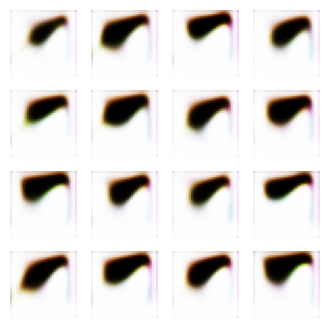

Epoch 0 - Inception Score: 1.0000 ± 0.0000
Epoch 0 - FID Score: 1398.1672


100%|██████████| 317/317 [01:01<00:00,  5.18it/s]                

Epoch [10/99] D_loss: 0.0003, G_loss: 9.1121


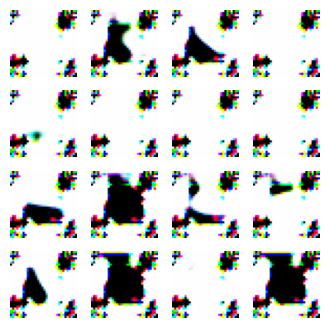

Epoch 10 - Inception Score: 1.0000 ± 0.0000
Epoch 10 - FID Score: 1803.2029


 73%|███████▎  | 232/317 [00:47<00:17,  4.84it/s]                


KeyboardInterrupt: 

In [206]:
train(epochs, train_loader, generator, discriminator, optimizer_G, optimizer_D, adversarial_loss, device, z_dim, txt_to_generate, metrics_data)